In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from conversion import CSVToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [9]:
class Model(nn.Module):
    def __init__(self) -> None:
        super(Model, self).__init__()
        self.input_size = 9
        self.hidden_size_1 = 9
        self.hidden_size_2 = 9
        self.hidden_size_3 = 9
        self.hidden_size_4 = 9
        self.hidden_size_5 = 9
        self.hidden_size_6 = 9
        self.hidden_size_7 = 9
        self.output_size = 9

        self.fc1 = nn.Linear(self.input_size, self.hidden_size_1)
        self.fc2 = nn.Linear(self.hidden_size_1, self.hidden_size_2)
        self.fc3 = nn.Linear(self.hidden_size_2, self.hidden_size_3)
        self.fc4 = nn.Linear(self.hidden_size_3, self.hidden_size_4)
        self.fc5 = nn.Linear(self.hidden_size_4, self.hidden_size_5)
        self.fc6 = nn.Linear(self.hidden_size_5, self.hidden_size_6)
        self.fc7 = nn.Linear(self.hidden_size_6, self.hidden_size_7)
        self.fc8 = nn.Linear(self.hidden_size_7, self.output_size)

        self.loss = nn.CrossEntropyLoss()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

        self.optim = None

        self.train_data = None
        self.test_data = None
        self.train_losses = []
        self.avg_epoch_losses = []


        self.target = None

    def initialize_optimizer(self):
        self.optim = torch.optim.AdamW(self.parameters())

    def forward(self, x):
        x1 = self.relu(self.fc1(x))
        x2 = self.relu(self.fc2(x1))
        x3 = self.relu(self.fc3(x2))
        x4 = self.relu(self.fc4(x3))
        x5 = self.relu(self.fc5(x4))
        x6 = self.relu(self.fc6(x5))
        x7 = self.relu(self.fc7(x6))
        x8 = self.fc8(x7)
        return x8
    
    def train_model(self, epochs):
        for epoch in epochs:
            epoch_loss = 0
            for src, trg in self.train_data:

                self.optim.zero_grad()
                output = self.forward(src)
                loss = self.loss (output, trg.argmax(dim=1))
                self.target = trg
                loss.backward()
                self.optim.step()
                epoch_loss += loss.item()
            avg_epoch_loss = epoch_loss / len(self.train_data)
            self.avg_epoch_losses.append(avg_epoch_loss)
            self.train_losses.append(loss.item())
            print(f'Epoch: {epoch}, Loss: {avg_epoch_loss}')
            print(f'           Loss.item: {loss.item()}')

    def save_model(self, path):
        torch.save(self.state_dict(), path)
    
    def inference(self, input):
        return self.forward(input)

    def plot_losses(self):
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(1, len(self.train_losses) + 1), self.train_losses, label='Loss item')
        plt.plot(np.arange(1, len(self.avg_epoch_losses) + 1), self.avg_epoch_losses, label='Average Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Test Loss over Epochs')
        plt.legend()
        plt.show()

In [10]:
#prepare the data for training,
from torch.utils.data import Dataset

path = 'dataset_states.csv'
loader = CSVToTensor(path)
loader.create_all_tensor()

class CustomDataset(Dataset):
    def __init__(self, input_tensor, output_tensor):
        self.input_tensor = input_tensor
        self.output_tensor = output_tensor

    def __len__(self):
        return len(self.input_tensor)

    def __getitem__(self, idx):
        input_data = self.input_tensor[idx]
        output_data = self.output_tensor[idx]
        return input_data, output_data

input_tensor = loader.game_tensor
output_tensor = loader.prediction_tensor

combined_dataset = CustomDataset(input_tensor, output_tensor)

combined_dataloader = DataLoader(combined_dataset, batch_size=28, shuffle=True)

In [11]:
model = Model()

model.initialize_optimizer()
model.train_data = combined_dataloader

In [15]:
model.train_model(range(700))

Epoch: 0, Loss: 1.035825204104185
           Loss.item: 0.9152618050575256
Epoch: 1, Loss: 1.0573974177241325
           Loss.item: 1.1231544017791748
Epoch: 2, Loss: 1.0846302546560764
           Loss.item: 0.7939132452011108
Epoch: 3, Loss: 1.1159542202949524
           Loss.item: 1.2309269905090332
Epoch: 4, Loss: 1.1111208610236645
           Loss.item: 1.2248382568359375
Epoch: 5, Loss: 1.090789820998907
           Loss.item: 1.2458264827728271
Epoch: 6, Loss: 1.0429970994591713
           Loss.item: 1.24774169921875
Epoch: 7, Loss: 1.0323011800646782
           Loss.item: 1.083608865737915
Epoch: 8, Loss: 1.0345421023666859
           Loss.item: 1.252897024154663
Epoch: 9, Loss: 1.0391855686903
           Loss.item: 1.0108329057693481
Epoch: 10, Loss: 1.0506740994751453
           Loss.item: 1.2671244144439697
Epoch: 11, Loss: 1.035816252231598
           Loss.item: 0.9548277258872986
Epoch: 12, Loss: 1.0683671683073044
           Loss.item: 1.1908386945724487
Epoch: 13, Loss: 1.

In [6]:

def get_max_tensor(output):
    max_tensor = torch.zeros_like(output)
    max_tensor[0, output.argmax(dim=1)] = 2
    return max_tensor

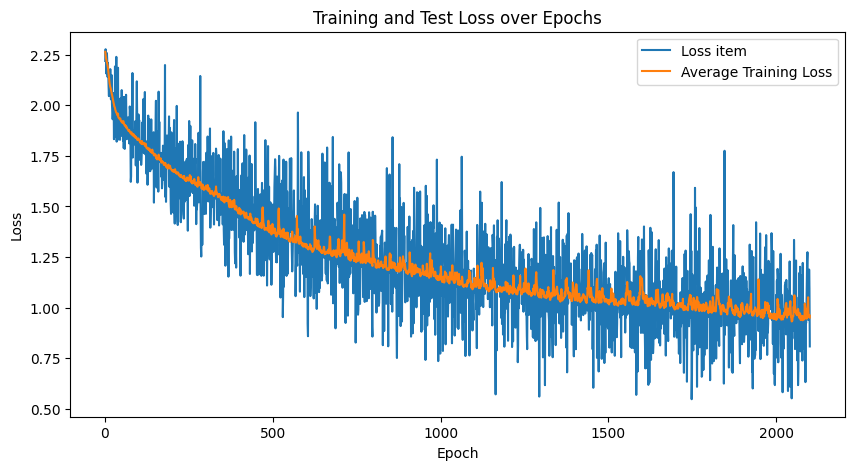

In [16]:
model.plot_losses() # for 9->9->9->9->9->9->9->9->9

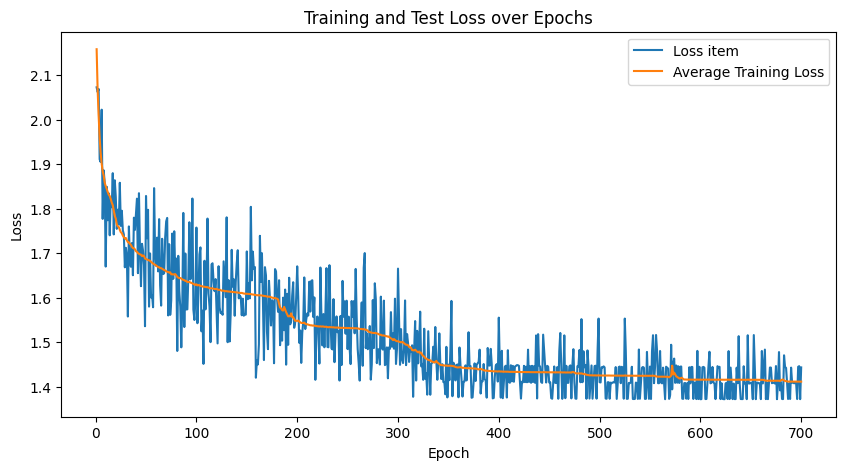

In [7]:
model.plot_losses() # for 9->728->9

In [16]:
input = torch.tensor([[0,1,1,0,2,0,0,0,0]], dtype=torch.float32)

output = model.inference(input)

print(output.shape)
print(output)
print(output.argmax(dim=1).item())

max_output = get_max_tensor(output)
print(max_output)

torch.Size([1, 9])
tensor([[9.9948e-01, 1.6606e-11, 1.0884e-16, 5.1708e-04, 5.7178e-17, 2.4587e-08,
         1.8731e-07, 5.9218e-07, 9.1240e-08]], grad_fn=<SoftmaxBackward0>)
0
tensor([[2., 0., 0., 0., 0., 0., 0., 0., 0.]])


/tmp/ipykernel_424322/3980566399.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.x2 = F.softmax(self.fc2(self.x1))


In [8]:
print(model.x0.shape)
print(model.x1.shape)
print(model.x2.shape)
print(model.target.shape)
print(model.x2)
print(model.target)

torch.Size([27, 9])
torch.Size([27, 729])
torch.Size([27, 9])
torch.Size([27, 9])
tensor([[9.9937e-01, 6.3111e-04, 1.9531e-08, 2.7194e-14, 6.9854e-22, 1.5216e-10,
         2.8058e-13, 2.1871e-10, 9.4791e-09],
        [1.0002e-04, 2.7582e-28, 1.4718e-13, 1.7997e-09, 7.6573e-10, 1.8049e-15,
         9.9990e-01, 1.5432e-15, 2.9874e-12],
        [1.7479e-01, 6.2029e-26, 5.8647e-13, 3.4043e-01, 4.8478e-01, 3.4507e-19,
         1.1280e-18, 4.9722e-14, 5.8799e-12],
        [2.5361e-04, 7.5946e-23, 3.6425e-13, 2.6651e-04, 3.1559e-19, 1.3607e-05,
         3.7033e-11, 2.0794e-08, 9.9947e-01],
        [3.0786e-20, 8.9839e-05, 9.9991e-01, 7.2398e-08, 3.2949e-14, 9.7942e-25,
         2.5318e-09, 7.1753e-21, 1.3631e-16],
        [9.9906e-01, 2.0813e-25, 2.6293e-17, 8.2989e-05, 9.1269e-06, 2.0505e-04,
         8.0913e-18, 1.1268e-09, 6.4638e-04],
        [1.1255e-23, 9.9929e-01, 3.3739e-19, 1.9856e-16, 1.1636e-26, 8.7244e-15,
         7.1195e-04, 3.3724e-20, 4.1140e-10],
        [2.8911e-05, 1.3650e-

In [17]:
model.save_model('model_weights.pth')